In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from glob import glob as glob

from scipy.stats import mode
import re
#그래프 설정
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## data load

In [2]:
os.listdir('./data/')

['new_people.csv', 'open.zip', 'process.csv', 'suggest.csv']

In [3]:
people = pd.read_csv('./data/new_people.csv',encoding = 'cp949')
suggest = pd.read_csv('./data/suggest.csv')
process = pd.read_csv('./data/process.csv')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.options.display.max_columns = 30
people.shape, suggest.shape, process.shape

((5605, 16), (62658, 12), (68530, 28))

## 변수정리 및 생성 2020-12-04 16:04:35 

### People

In [5]:
#위원의 출생년
people['BIRTH_YEAR'] = people['BIRTH'].apply(lambda x :x[:4])

In [16]:
#역대정당정보 가져오기 (당명칭 확인후 정확한 클리닝 필요)
datas = []
partys = []
for data in people['DAE']:
    if '\r\n' in data :
        data = data.split('\r\n')
        data = list(filter(lambda x: x != '',data))
        p_party = [] #개인의 정당
        for el in data:
            el = el.replace('\t','')
            if len(el)>1 :
                try :
                    if ')' in el:
                        party = el.split(')')[1]
                    else:
                        party = el.split('-')[1]
                    party = party.replace(' ','')
                    p_party.append(party)
                except:
                    p_party.append('') 
                
    datas.append(data)
    partys.append(p_party)
people['PARTYS']= partys

In [28]:
#당시의 정당
people["NOW_PARTY"] = people['PARTYS'].apply(lambda x :x[-1])

#참여했던 정당 수 
people['NUM_PARTY'] = people['PARTYS'].apply(lambda x : len(np.unique(x)))

In [34]:
uni_people = people.drop_duplicates(['NAME','BIRTH'])
origin = people.shape[0]
uni_num = uni_people.shape[0]
print(f'원본데이터:{origin}\n중복제거:{uni_num}\n차이:{origin-uni_num}')

원본데이터:5605
중복제거:3066
차이:2539


In [41]:
#약 143명은 중복이름
uni_name = uni_people["NAME"].nunique()
print(f'중복제거:{uni_num}\n고유이름:{uni_name}\n차이:{uni_num-uni_name}')

중복제거:3066
고유이름:2923
차이:143


#### 동명이인
* '대'로 표기하기엔 동일한 대에서 동명이인 발생 -> 해결 필요할 것으로 추정  
sample1 : 이종성 (21,16,11,2)   
sample2 : 김영구 (16,16,5)   

In [56]:
#sample1 : 이종성 (21,16,11, 2)
#sample2 : 김영구 (16,16,5)
sample_name = uni_people['NAME'].value_counts().index[3]
sample_name = '이명수' #제안이 가장 많았던 의원(동명이인이없다)
uni_people[uni_people['NAME'] == sample_name]['DAESU']

189    21
Name: DAESU, dtype: int64

In [55]:
uni_people[uni_people['NAME'] == sample_name]

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL,BIRTH_YEAR,PARTYS,NOW_PARTY,NUM_PARTY
1612,16,제11대 국회의원(정당_17)정당_50\r\n제12대 국회의원(정당_17)정당_50...,16대의원,김영구,金榮龜,NaN,NaN,1940년 01월 12일,NaN,NaN,동국대학교경제과졸\r\n공화당청년분과위원장\r\n대한체육회역도연맹부회장\r\n4.1...,NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,1940,"[정당_50, 정당_50, 정당_50, 정당_28, 정당_31, 정당_34]",정당_34,4
1613,16,제16대 국회의원(정당_17)정당_34\r\n,16대의원,김영구,金永求,NaN,虎岩,1941년 09월 12일,광산,전북 전주,전북대학교 농과대학\r\n충남대학교 행정대학원 최고관리자과정 수료\r\n전북대학교 ...,"무교, 등산",높은산 푸른솔아(자서전)\r\n전북라이온스30년사\r\n전북새마을운동 25년사\r\...,대한청소년연맹 청소년공로상(대훈장)\r\n애향도민의장(새마을장)외 260여회 수상\r\n,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,1941,[정당_34],정당_34,1
4519,5,제5대 국회의원(포천)민주당\r\n,5대의원,김영구,金永求,NaN,蕙村,1920년 12월 29일,언양,서울,제일고보(현 경기고)졸업\r\n일본복강학교 졸업\r\n일본 동경제대 법학부 정치학과...,"천주교, 바둑, 독서",NaN,NaN,2007년 03월 20일,http://www.rokps.or.kr/profile/profile_view.as...,1920,[민주당],민주당,1


### suggest

In [ ]:
#제안자수 
def find_num(x):
    import re
    pattern = re.compile('[0-9]+')
    x = str(x)
    num = re.findall(pattern,x)
    try :
        num = int(num[0])+1
    except:
        num = ''
    return num
suggest['PROPOSER_NUM'] = suggest['PROPOSER'].apply(lambda x : find_num(x))

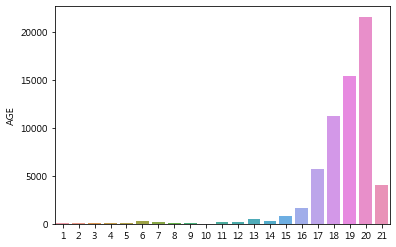

In [70]:
#제안량이 가장 높았던건 20대 
counted = suggest['AGE'].value_counts().sort_index()
sns.barplot(x = counted.index, y= counted)
plt.show()

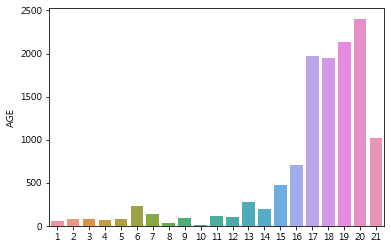

In [77]:
#중복된 법률명을 제외하면 17~20대에서 큰 차이가 없음 (왜그랬을까? 고민해볼것 )
suggest_uni = suggest.drop_duplicates(["AGE",'BILL_NAME'])
counted = suggest_uni['AGE'].value_counts().sort_index()
sns.barplot(x = counted.index, y= counted)
plt.show()

In [81]:
#법률안을 7155개 -> 카테고리화가 가능하면 좋을듯
suggest['BILL_NAME'].nunique()

7155

In [28]:
#가장 제안을 많이한 의원은? (동명이인 배제)
suggest['RST_PROPOSER'].value_counts().head(10)

이명수    855
황주홍    835
강창일    500
오제세    463
김우남    457
이찬열    455
박광온    452
주승용    425
양승조    419
심재철    339
Name: RST_PROPOSER, dtype: int64

In [23]:
process['COMMITTEE_NM'].value_counts().head(30)

법제사법위원회            5598
보건복지위원회            5372
환경노동위원회            4124
행정안전위원회            3829
기획재정위원회            3522
정무위원회              3370
국토교통위원회            2766
국회운영위원회            2656
재정경제위원회            2413
농림축산식품해양수산위원회      2068
안전행정위원회            1867
본회의                1748
국방위원회              1659
교육문화체육관광위원회        1524
행정자치위원회            1493
교육위원회              1477
산업통상자원중소벤처기업위원회    1102
국토해양위원회            1069
건설교통위원회             982
내무위원회               947
과학기술정보방송통신위원회       846
외교통일위원회             729
재무위원회               726
산업통상자원위원회           723
농림해양수산위원회           721
여성가족위원회             721
문화체육관광위원회           715
산업자원위원회             681
교육과학기술위원회           661
문화관광위원회             599
Name: COMMITTEE_NM, dtype: int64